In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [110]:
df = pd.read_csv("csv/new_csv/cleaned_data.csv")
df.head()

,name,mark,year,mileage,engine_power_kW,engine_power_hp,fuel_type,consumption_(l/100 km),ecology_(gCO2/km),gearbox,price,currency,country,engine_size,nr_of_accidents,color_exterior,color_interior,price_eur
0,daewoo rezzo,daewoo,2003,200000.0,89.0,121.0,Gasoline,9.0,236.0,Manual,199.0,EUR,Germany,0.0,NaN,unknown,unknown,199.0
1,volkswagen golf,volkswagen,1994,222275.0,55.0,75.0,Gasoline,0.0,0.0,Manual,200.0,EUR,Germany,0.0,NaN,unknown,unknown,200.0
2,ford fiesta,ford,2001,153000.0,44.0,60.0,Gasoline,7.3,171.0,Manual,290.0,EUR,Germany,0.0,NaN,unknown,unknown,290.0
3,volkswagen polo,volkswagen,1999,154000.0,44.0,60.0,Gasoline,6.3,151.0,Manual,350.0,EUR,Germany,0.0,NaN,unknown,unknown,350.0
4,nissan micra,nissan,1998,140000.0,40.0,54.0,Gasoline,6.0,152.0,Manual,380.0,EUR,Germany,0.0,NaN,unknown,unknown,380.0


In [111]:
df = df.drop(["price", "currency"], axis=1)

In [112]:
df_nan = df[df.engine_power_kW > 0].drop(["country","engine_size","nr_of_accidents","color_exterior","color_interior"], axis=1)
df_nan

,name,mark,year,mileage,engine_power_kW,engine_power_hp,fuel_type,consumption_(l/100 km),ecology_(gCO2/km),gearbox,price_eur
0,daewoo rezzo,daewoo,2003,200000.0,89.0,121.0,Gasoline,9.0,236.0,Manual,199.0
1,volkswagen golf,volkswagen,1994,222275.0,55.0,75.0,Gasoline,0.0,0.0,Manual,200.0
2,ford fiesta,ford,2001,153000.0,44.0,60.0,Gasoline,7.3,171.0,Manual,290.0
3,volkswagen polo,volkswagen,1999,154000.0,44.0,60.0,Gasoline,6.3,151.0,Manual,350.0
4,nissan micra,nissan,1998,140000.0,40.0,54.0,Gasoline,6.0,152.0,Manual,380.0
...,...,...,...,...,...,...,...,...,...,...,...
353,renault megane,renault,2010,96133.0,81.0,110.0,Diesel,4.4,110.0,Automatic,5190.0
354,opel corsa,opel,2012,91158.0,64.0,87.0,Gasoline,5.7,135.0,Manual,5200.0
355,toyota yaris,toyota,2010,94200.0,51.0,69.0,Gasoline,5.0,115.0,Manual,5200.0
356,bmw 116,bmw,2008,164145.0,90.0,122.0,Gasoline,NaN,NaN,Manual,5280.0


In [113]:
gearbox = df.gearbox.unique()
gearbox = dict(zip(gearbox, range(len(gearbox))))

fuels = df.fuel_type.unique()
fuels = dict(zip(fuels, range(len(fuels))))

marks = df.mark.unique()
marks = dict(zip(marks, range(len(marks))))

color_exterior = df.color_exterior.unique()
color_exterior = dict(zip(color_exterior, range(len(color_exterior))))

color_interior = df.color_interior.unique()
color_interior = dict(zip(color_interior, range(len(color_interior))))

df = df.replace({'gearbox': gearbox, 'fuel_type': fuels, "color_exterior":color_exterior,
                "mark":marks, "color_interior":color_interior})
df.head()

,name,mark,year,mileage,engine_power_kW,engine_power_hp,fuel_type,consumption_(l/100 km),ecology_(gCO2/km),gearbox,country,engine_size,nr_of_accidents,color_exterior,color_interior,price_eur
0,daewoo rezzo,0,2003,200000.0,89.0,121.0,0,9.0,236.0,0,Germany,0.0,NaN,0,0,199.0
1,volkswagen golf,1,1994,222275.0,55.0,75.0,0,0.0,0.0,0,Germany,0.0,NaN,0,0,200.0
2,ford fiesta,2,2001,153000.0,44.0,60.0,0,7.3,171.0,0,Germany,0.0,NaN,0,0,290.0
3,volkswagen polo,1,1999,154000.0,44.0,60.0,0,6.3,151.0,0,Germany,0.0,NaN,0,0,350.0
4,nissan micra,3,1998,140000.0,40.0,54.0,0,6.0,152.0,0,Germany,0.0,NaN,0,0,380.0


In [114]:
df.loc[df.year < 1, ["year"]] = "unknown"
df = df[df.price_eur < 1600000]
df.price_eur.describe().to_frame()

,price_eur
count,1699.000000
mean,14185.759052
std,22608.300283
min,12.370000
25%,3990.000000
50%,9319.110000
75%,15708.595000
max,389000.000000


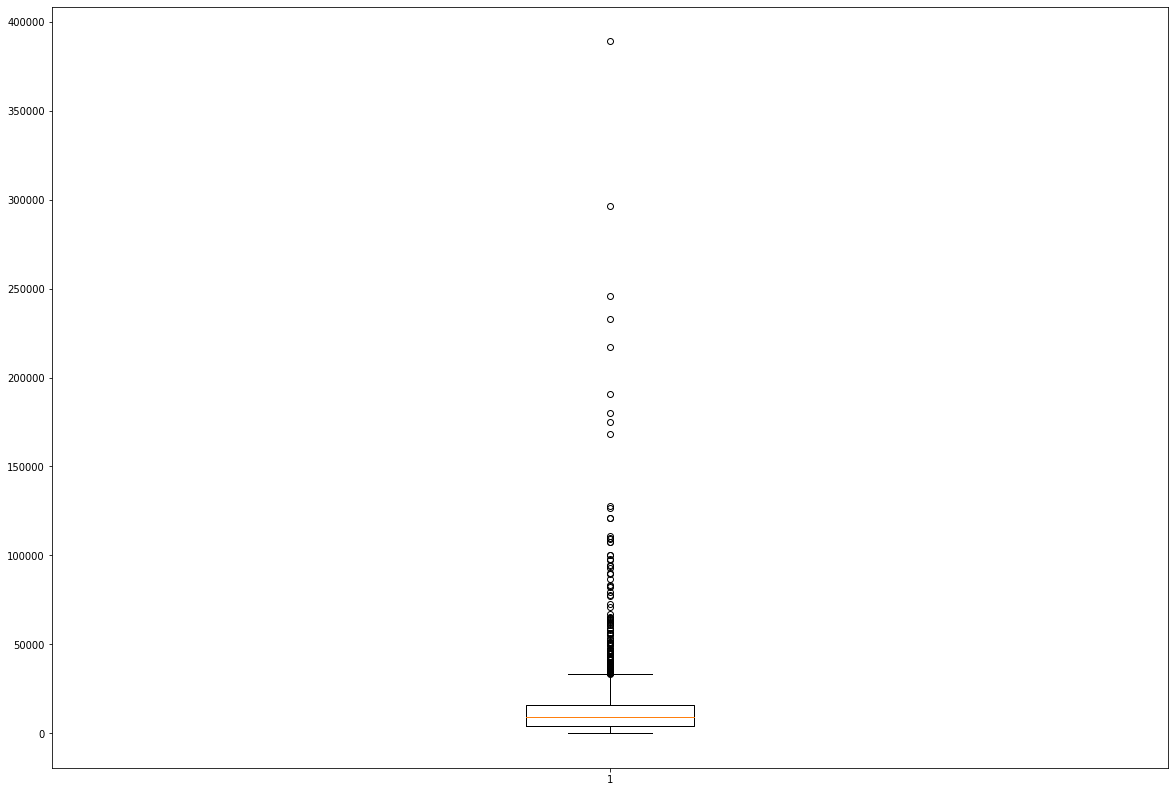

In [115]:
plt.figure(figsize= (20, 14))
plt.boxplot(df.price_eur)
plt.show()

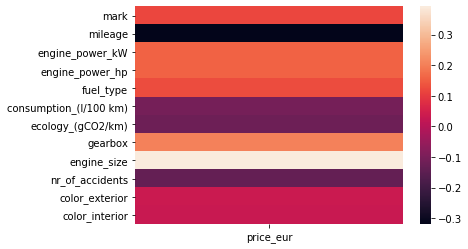

In [116]:
import seaborn as sns
sns.heatmap(df.corr().price_eur.to_frame().drop(["price_eur"], axis=0))

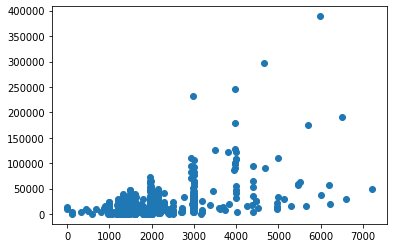

In [117]:
df_eng_size = df[df.engine_size > 0]
df_eng_size
plt.scatter(df_eng_size.engine_size, df_eng_size.price_eur)
plt.show()

In [118]:
df_eng_size.engine_size.describe().to_frame()

,engine_size
count,716.000000
mean,2059.490223
std,967.239955
min,1.000000
25%,1497.000000
50%,1968.000000
75%,2148.000000
max,7201.000000


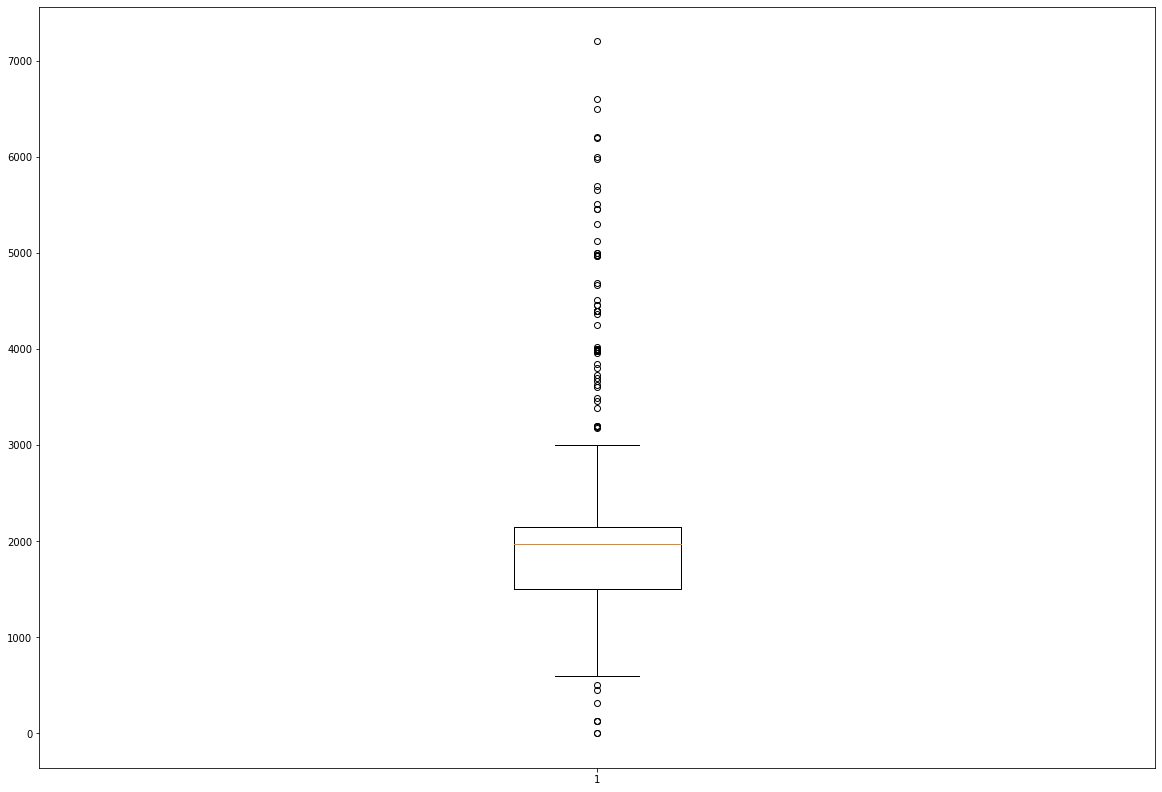

In [119]:
plt.figure(figsize= (20, 14))
plt.boxplot(df_eng_size.engine_size)
plt.show()

In [120]:
df_eng_test = df[df.engine_size == 0]
df_eng_test.head()

,name,mark,year,mileage,engine_power_kW,engine_power_hp,fuel_type,consumption_(l/100 km),ecology_(gCO2/km),gearbox,country,engine_size,nr_of_accidents,color_exterior,color_interior,price_eur
0,daewoo rezzo,0,2003,200000.0,89.0,121.0,0,9.0,236.0,0,Germany,0.0,NaN,0,0,199.0
1,volkswagen golf,1,1994,222275.0,55.0,75.0,0,0.0,0.0,0,Germany,0.0,NaN,0,0,200.0
2,ford fiesta,2,2001,153000.0,44.0,60.0,0,7.3,171.0,0,Germany,0.0,NaN,0,0,290.0
3,volkswagen polo,1,1999,154000.0,44.0,60.0,0,6.3,151.0,0,Germany,0.0,NaN,0,0,350.0
4,nissan micra,3,1998,140000.0,40.0,54.0,0,6.0,152.0,0,Germany,0.0,NaN,0,0,380.0


122.506045503725
0.2563641580872533


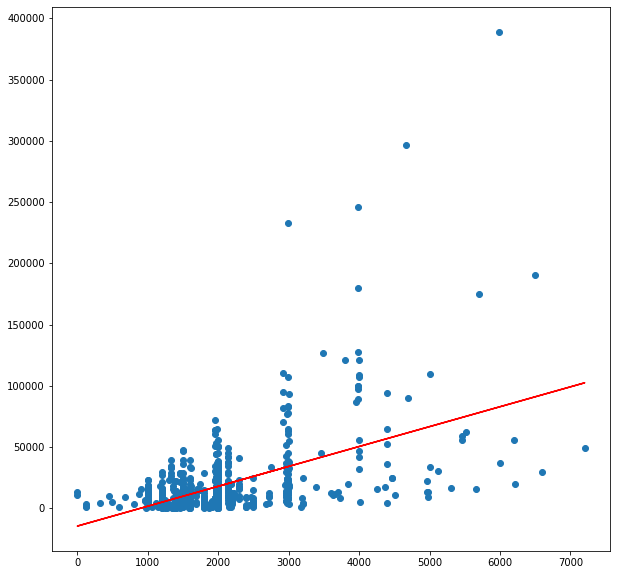

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import operator
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

x = np.array(df_eng_size.engine_size).reshape(-1, 1)
y = np.array(df_eng_size.price_eur).reshape(-1, 1)

reg = LinearRegression().fit(x, y)
y_pred = reg.predict(x)

rmse = np.sqrt(mean_absolute_error(y, y_pred))
r2 = r2_score(y,y_pred)
print(rmse)
print(r2)

plt.figure(figsize=(10,10))
plt.scatter(x, y)
plt.plot(x, y_pred, color="red")
plt.show()

119.02127760466563
0.27962994098969485


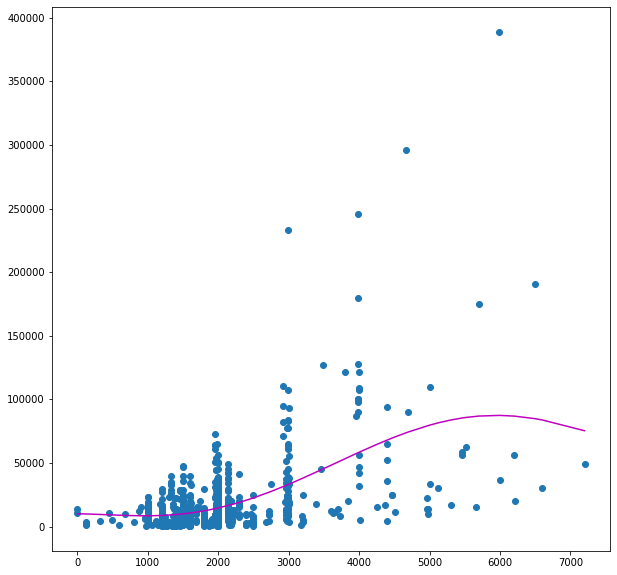

In [122]:
x = np.array(df_eng_size.engine_size).reshape(-1, 1)
y = np.array(df_eng_size.price_eur).reshape(-1, 1)

pf = PolynomialFeatures(degree=5).fit_transform(x)
lr = LinearRegression().fit(pf, y)
y_pred = lr.predict(pf)

rmse = np.sqrt(mean_absolute_error(y,y_pred))
r2 = r2_score(y,y_pred)
print(rmse)
print(r2)

plt.figure(figsize=(10,10))
plt.scatter(x, y)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_pred), key=sort_axis)
x, y_pred = zip(*sorted_zip)
plt.plot(x, y_pred, color='m')
plt.show()

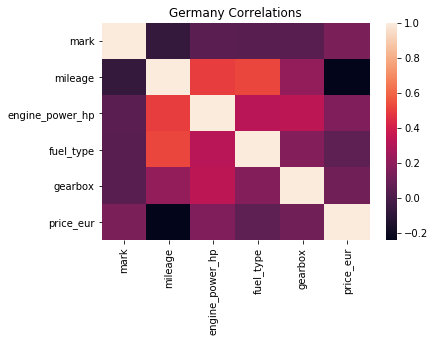

In [237]:
d = df[(df.country == "Germany")].dropna(axis=1).drop(["engine_size", "color_interior",
                                    "engine_power_kW", "color_exterior"], axis=1)
sns.heatmap(d.corr()).set_title("Germany Correlations")
plt.show()

In [238]:
d.shape

(358, 9)

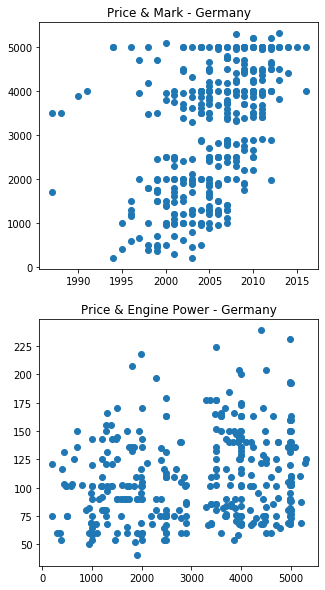

In [240]:
plt.figure(figsize=(5, 10))
plt.subplot(211)
plt.scatter(d['year'], d["price_eur"])
plt.title("Price & Mark - Germany")
plt.subplot(212)
plt.scatter(d["price_eur"], d['engine_power_hp'])
plt.title("Price & Engine Power - Germany")

plt.show()

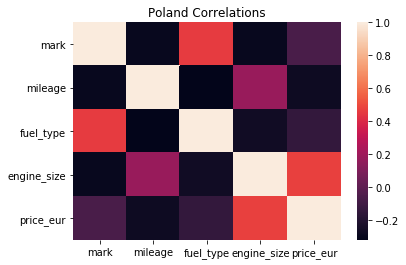

In [241]:
d = df[(df.country == "Poland") & (df.year !="unknown")].dropna(axis=1).drop(
    ["gearbox", "color_exterior", "color_interior"], axis=1)
sns.heatmap(d.corr()).set_title("Poland Correlations")
plt.show()

In [242]:
d.shape

(244, 8)

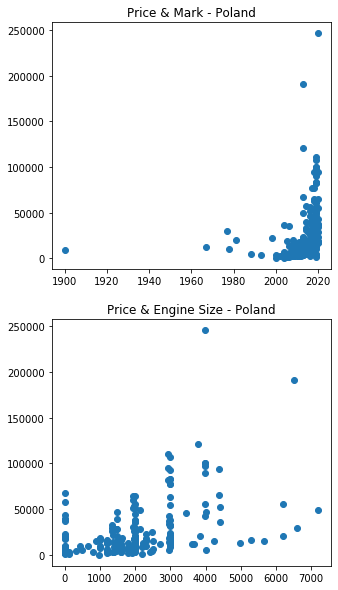

In [243]:
plt.figure(figsize=(5, 10))
plt.subplot(211)
plt.scatter(d['year'], d["price_eur"])
plt.title("Price & Mark - Poland")
plt.subplot(212)
plt.scatter( d['engine_size'], d["price_eur"])
plt.title("Price & Engine Size - Poland")

plt.show()

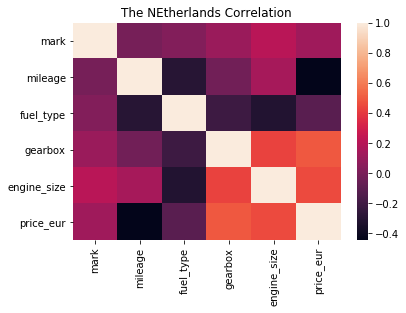

In [244]:
d = df[(df.country == "The Netherlands") & (df.year !="unknown")].dropna(axis=1).drop(["color_interior", "color_exterior"], axis=1)
sns.heatmap(d.corr()).set_title("The NEtherlands Correlation")
plt.show()

In [245]:
d.shape

(294, 9)

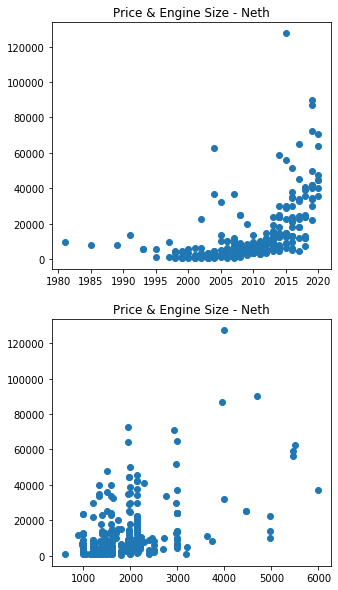

In [246]:
plt.figure(figsize=(5, 10))
plt.subplot(211)
plt.scatter(d['year'],  d["price_eur"])
plt.title("Price & Engine Size - Neth")
plt.subplot(212)
plt.scatter( d['engine_size'], d["price_eur"])
plt.title("Price & Engine Size - Neth")

plt.show()

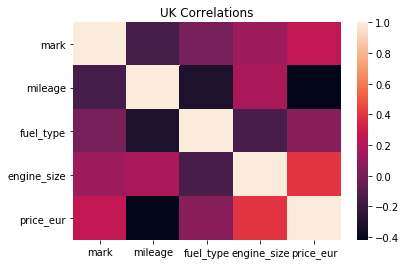

In [247]:
d = df[df.country == "Great Britain"].dropna(axis=1).drop(
    ["color_interior", "color_exterior", "gearbox"],axis=1)
sns.heatmap(d.corr()).set_title("UK Correlations")
plt.show()

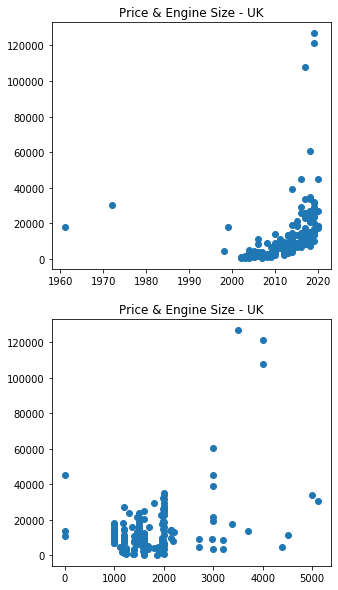

In [248]:
plt.figure(figsize=(5, 10))
plt.subplot(211)
plt.scatter(d['year'], d["price_eur"])
plt.title("Price & Engine Size - UK")
plt.subplot(212)
plt.scatter( d['engine_size'], d["price_eur"])
plt.title("Price & Engine Size - UK")

plt.show()

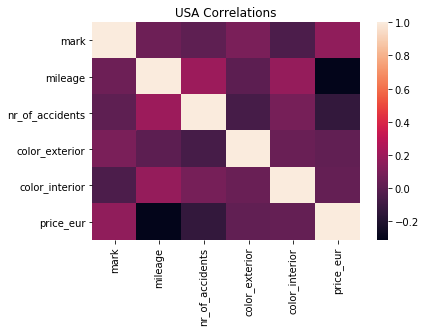

In [249]:
d = df[df.country == "United States"].dropna(axis=1).drop(
    ["fuel_type", "engine_size", "gearbox"],axis=1)
sns.heatmap(d.corr()).set_title("USA Correlations")
plt.show()

In [250]:
d.shape

(573, 9)

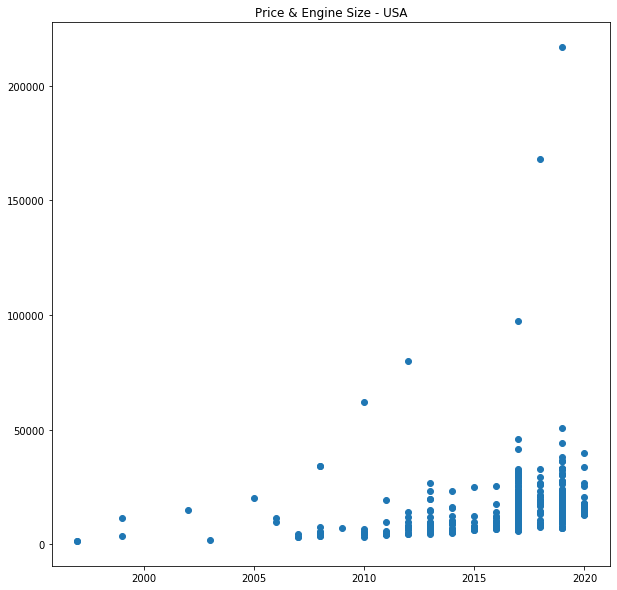

In [251]:
plt.figure(figsize=(10, 10))
plt.scatter(d['year'], d["price_eur"])
plt.title("Price & Engine Size - USA")

plt.show()

We can see that in Germany, year has actually an impact on a price.
On the other hand in UK and The Netherlands, the feature is more or less correlated with price is engine size.